# Secure Data Science with Differential Privacy using Hagrid

### Data Scientist (DS)
- connect to domain node
- access datasets on Domain Node
- aggregate data from multiple sources
- Perform Datascience
- Publish the results

In [1]:
import syft as sy
import numpy as np
# from syft.core.adp.entity import Entity
# if entity is not found -- change the jupyter kernel
# !jupyter kernelspec list

In [4]:
data_scientist_node = sy.login(email="ds_boston@stuba.sk", password="ppdml", port=8081)

Connecting to None... done! 	 Logging into angry_chollet... done!


In [5]:
data_scientist_node.privacy_budget
# data_scientist_node.request_budget(eps=1000, reason="I want to do data exploration")
# domain_node.requests[].accept() -- single request handler
# data_scientist_node.privacy_budget

100.0

In [7]:
data_scientist_node.datasets

Idx,Name,Description,Assets,Id
[0],COVID19 Cases in 175 countries,Weekly data for an entire year,"[""Country 0""] -> Tensor[""Country 1""] -> Tensor[""Country 2""] -> Tensor...",c39e5695-2b8d-4217-9392-8d4a2f2b82b3
[1],Boston Housing,503 entries with 14 attributed describing housing concerns,"[""Client 0""] -> Tensor[""Client 1""] -> Tensor[""Client 2""] -> Tensor...",7ec014e5-fe02-460c-95f7-8b352fae408b


In [9]:
boston_ds = data_scientist_node.datasets[1]

In [10]:
result = boston_ds["Client 0"]
published_result = result.publish(sigma=10)
published_result.block_with_timeout(30).get()
#this data is bullshit

array([  2.53965625,  -5.10365029, -12.84774596, -18.5193804 ,
        -9.6578903 , -12.00845729,  -3.09667176,  -9.76750424,
        -9.86399443,  19.70565858,  -5.83211465, -15.81688508])

In [12]:
published_data = []

for i in [24, 129] + list(range(5)):
    result = boston_ds[f'Client {i}']
    published_result = result.publish(sigma=10)
    published_result.block_with_timeout(30)
    published_data.append(published_result.get())
    print(data_scientist_node.privacy_budget)

published_data = np.asarray(published_data)

1100.0
1100.0
1100.0
1100.0
1100.0
1100.0
1100.0


(<AxesSubplot:>,
           0          1          2          3          4          5   \
 0   7.211032  -3.055585   2.122945 -16.948602  -0.862130 -10.007625   
 1 -10.264607  -6.743710  12.402698  -7.186194 -11.179617 -12.658762   
 2 -25.967972 -17.455795   5.616747  -1.817825 -15.288163  11.271230   
 3 -11.048595   9.790648  -2.650177 -28.563635   0.032974   3.337264   
 4 -17.978475  -6.188226   2.189965 -18.496083  -9.470614  20.045936   
 5  11.888113   0.496693   1.546554  13.645935 -10.338029  -0.283399   
 6   4.655081  -3.413312 -13.281561  -3.766016   2.907333   3.374015   
 
           6          7          8          9   ...         44         45  \
 0  14.949698  21.785829   1.758211 -15.712221  ... -20.652264  -2.735288   
 1   7.104208  -6.151953   2.548230  -6.654936  ... -19.028114 -21.290087   
 2  -3.191378 -16.349420  27.683582   6.248444  ...  -5.057731  -5.962395   
 3  -4.309263  -3.670960  32.178619   5.682989  ... -16.231577  -2.760783   
 4   4.889368 -22.57

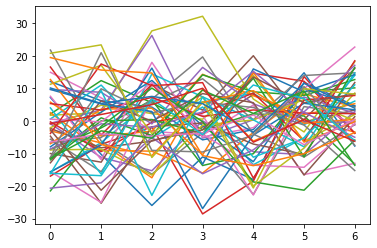

In [13]:
import pandas as pd
data_df = pd.DataFrame(published_data)
data_df.plot(legend=False), data_df

<AxesSubplot:>

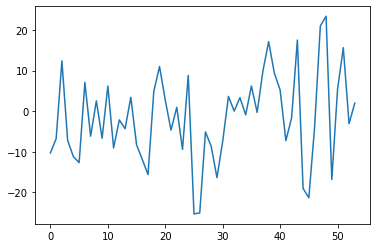

In [14]:
data_df.loc[1].plot()

<AxesSubplot:>

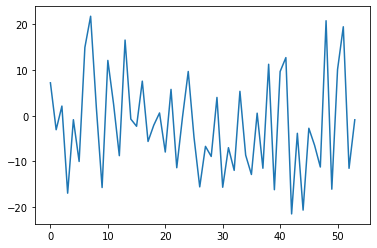

In [15]:
data_df.loc[0].plot()

In [28]:
import matplotlib, matplotlib.pyplot as plt
def plot_extrapolated_country(idx):
    x = list(range(54))
    y = data_df.iloc[idx].values

    plt.plot(y)

    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    new_y = []
    for x2 in new_points:
        new_y.append(f(54+x2))

    plt.plot(range(53, 65), new_y)

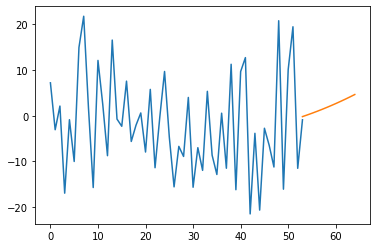

In [33]:
plot_extrapolated_country(0)

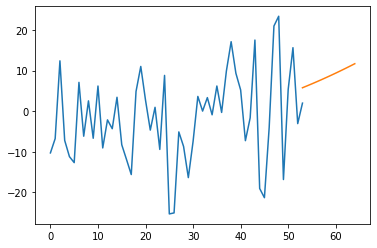

In [34]:
plot_extrapolated_country(1)

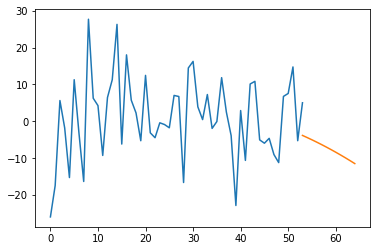

In [35]:
plot_extrapolated_country(2)